#### Load Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import warnings
warnings.filterwarnings('ignore')

#### Load Data set Training and Testing

In [2]:
train_df = pd.read_csv('doc_fee_train.csv')

In [3]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#### testing Dataset
test_df = pd.read_csv('doc_fee_test.csv')

In [5]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# EDA Exploritory Data Analysis

In [6]:
#### see the shape of train dataset

train_df.shape ### 5961 rows and a7 columns

(5961, 7)

In [7]:
#### see the shape of test dataset

test_df.shape # 1987 rows and 6 columns

(1987, 6)

In [8]:
#### check train column type

train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
##### having all columns in catagorial form except fees which is target variable


In [10]:
train_df['Qualification']

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object

In [11]:
##### check Null Value for the dataset
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
#### check the percentage of missing values
train_df.isnull().sum()/len(train_df)*100

Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64

In [13]:
##### split the year of experience
train_df['Experience']=train_df['Experience'].str.split()

#### split int value from experience
train_df['Experience']=train_df['Experience'].str[0].astype("int")

In [14]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [15]:
##### Now split the place columns for city and place separately
train_df['Place']=train_df['Place'].str.split(',')

In [16]:
train_df['City']=train_df['Place'].str[-1]

In [17]:
train_df['Place'] = train_df['Place'].str[0]

In [18]:
train_df["Rating"].fillna("-99%",inplace=True)
train_df["Rating"] = train_df["Rating"].str[:-1].astype("int")

In [19]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-99,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,-99,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,Bangalore
4,BAMS,20,100,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,-99,Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,97,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [20]:
##### split the qualification columns into indivisual qualification and drop the real one

In [21]:
train_df['Qual_1'] = train_df['Qualification'].str.split(',').str[0]

In [22]:
train_df['Qual_2'] = train_df['Qualification'].str.split(',').str[1]

In [23]:
train_df['Qual_3'] = train_df['Qual_2'].str.split('-').str[1]

In [24]:
train_df['Qual_2'] = train_df['Qual_2'].str.split('-').str[0]

In [25]:
train_df['Qual_4'] = train_df['Qual_1'].str.split('-').str[1]

In [26]:
train_df['Qual_1'] = train_df['Qual_1'].str.split('-').str[0]

In [27]:
train_df.drop('Qualification',axis=1,inplace=True)

In [28]:
train_df

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4
0,24,100,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,BHMS,MD,Homeopathy,NaN
1,12,98,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,BAMS,MD,Ayurveda Medicine,NaN
2,9,-99,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,MBBS,MS,Otorhinolaryngology,NaN
3,12,-99,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,Bangalore,BSc,BAMS,NaN,Zoology
4,20,100,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,BAMS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,MBBS,MS,ENT,NaN
5957,33,-99,Nungambakkam,General Medicine,NaN,100,Chennai,MBBS,NaN,NaN,NaN
5958,41,97,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,MBBS,NaN,NaN,NaN
5959,15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,MBBS,MD,General Medicine,NaN


#### fill NaN value 




In [29]:
train_df.fillna('None',inplace=True)

In [30]:
train_df

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4
0,24,100,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,BHMS,MD,Homeopathy,None
1,12,98,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,BAMS,MD,Ayurveda Medicine,None
2,9,-99,Mathikere - BEL,ENT Specialist,None,300,Bangalore,MBBS,MS,Otorhinolaryngology,None
3,12,-99,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,Bangalore,BSc,BAMS,None,Zoology
4,20,100,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,MBBS,MS,ENT,None
5957,33,-99,Nungambakkam,General Medicine,None,100,Chennai,MBBS,None,None,None
5958,41,97,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,MBBS,None,None,None
5959,15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,MBBS,MD,General Medicine,None


In [31]:
train_df['Qual_1'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc ', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM ', 'MD ', 'MDS ',
       'Get inspired by remarkable stories of people like you', 'PhD ',
       'MRCPS', 'MS ', 'DDVL',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'GCEH',
       'Post Graduate Diploma in Healthcare Management(PGDHM)', 'DNB ',
       'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
       'Fellowship in Aesthetic Medicine', 'BSAM',
       'Diploma in Family Medicine (DFM)', 'FNB ',
       'Post Graduate Diploma in Dermotology (PGDD)',
       'Certificate of Oral Implantology', 'Certified In Panchkarma',
       '39 years experience', 'LCEH',
       'Doctor of Homeopathic Medicine (HMD)',
       'Diploma in Child Health (DCH)',
       'Diploma in Otorhinolaryngology (DLO)',
       'Diplomate of National Board Exam', 'MSc',
       'Fellowship and Diplomate in Implantology from ICOI (USA)',
       'Post Do

In [32]:
train_df['Qual_2'].unique()

array([' MD ', ' MS ', ' BAMS', 'None', ' BDS', ' MS', ' MDS', ' MDS ',
       ' Diploma in Otorhinolaryngology (DLO)', ' MF', ' DNB', ' DNB ',
       ' Fellowship of College of General Practice (FCGP)', ' DDVL',
       ' IBCLC (USA)', ' MBBS', ' Diploma in Cosmetology', ' AFIH',
       ' M. D. Hom. (Practice of Medicine)',
       ' Diploma in Emergency Medicine',
       ' DHMS (Diploma in Homeopathic Medicine and Surgery)',
       ' Member of the Royal College of Physicians',
       ' Diploma In Skin Aesthetics',
       ' Certificate in Cosmetic Dentistry', ' DDV',
       ' Venereology & Leprosy',
       ' Post Graduate Diploma in Emergency Services (PGDEMS)',
       ' PGD in Endodontics', ' MOrth', ' FRCP',
       ' Diploma in Dermatology', ' P.G Diploma in Aesthetic Dentistry',
       ' Diploma in Health Administration',
       ' Certificate in Dental Implants',
       ' Post Graduate Diploma in Diabetology (PGDD)', ' M.Sc.',
       ' MS (Shalyatantra)',
       ' Post Graduate Diplo

In [33]:
train_df['Qual_3'].unique()

array([' Homeopathy', ' Ayurveda Medicine', ' Otorhinolaryngology',
       'None', ' General Medicine', ' Oral & Maxillofacial Surgery',
       ' ENT', ' Pediatrics', ' Prosthodontist And Crown Bridge',
       ' Dermatology ', ' Oral and Maxillofacial Pathology',
       ' Psychology', ' Dermatology', ' Rheumatology',
       ' Paedodontics And Preventive Dentistry',
       ' Conservative Dentistry & Endodontics', ' Acupuncture',
       ' Periodontology and Oral Implantology', ' Periodontics',
       ' Pedodontics', ' Ayurveda',
       ' Tuberculosis & Respiratory Diseases/Medicine', ' Skin & VD',
       ' Internal Medicine', ' Family Medicine', ' Pediatric',
       ' Prosthodontics', ' Clinical Nutrition and Dietetics',
       ' Alternate Medicine', ' General Surgery',
       'Aging And Aesthetic Medicine', ' Oral Medicine and Radiology',
       'Diagnosis', ' Pathology', ' Medicine',
       ' Orthodontics and Dentofacial Orthopaedics',
       ' Critical Care Medicine', ' Public Health 

In [34]:
train_df['Qual_4'].unique()

array(['None', ' Zoology', ' Neurology', ' Homeopathy',
       ' Prosthodontist And Crown Bridge',
       ' Oral & Maxillofacial Surgery',
       ' Periodontology and Oral Implantology', ' Dermatology',
       'Oral Pathology and Oral Microbiology', ' Dermatology ',
       ' Orthodontics & Dentofacial Orthopaedics',
       ' Conservative Dentistry & Endodontics', ' Ayurveda Medicine',
       ' General Surgery', ' General Medicine', ' ENT',
       ' Internal Medicine', ' Otorhinolaryngology', ' Paediatrics',
       ' Ayurvedic Gynecology & Obstetrics', ' Skin & VD',
       ' Periodontics', ' Infectious Disease',
       ' Dermatology & Venereology', ' Neuropsychology', ' Pedodontics',
       ' Orthodontics and Dentofacial Orthopaedics', ' Anaesthesiology',
       ' Prosthodontics', ' Orthodontics', ' Ayurvedic Pharmacology',
       ' Ayurvedic Obstetrics and Gynecology',
       ' Paedodontics And Preventive Dentistry', ' Medicine',
       ' Physician', ' Skin', ' Oral Medicine and Radiol

##### visualization Tech

In [35]:
train_df['Fees'].isnull().sum()

0

<AxesSubplot:>

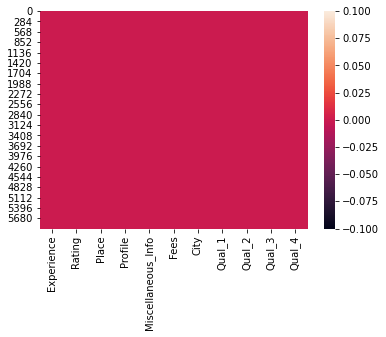

In [36]:
#### check null vlaue 
sns.heatmap(train_df.isnull())

<AxesSubplot:xlabel='Experience', ylabel='count'>

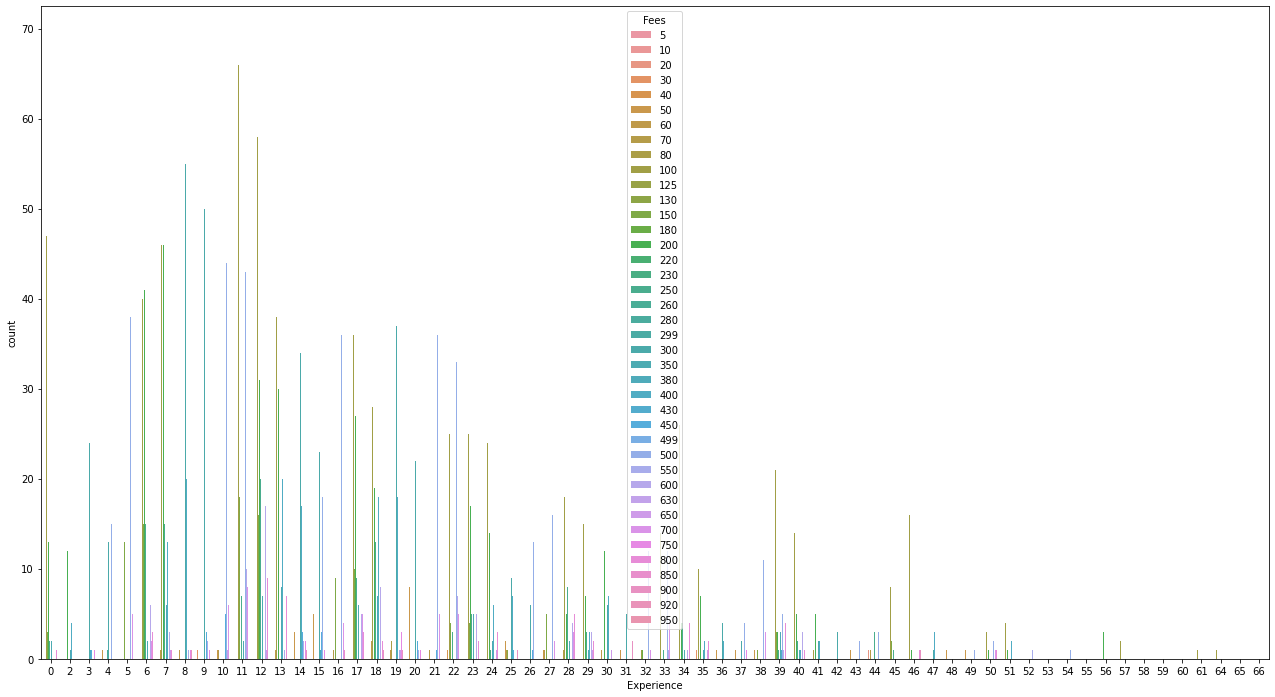

In [37]:
##### count plot to see the fess with experience
plt.figure(figsize=(22,12))
sns.countplot(x='Experience',hue='Fees',data=train_df)

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

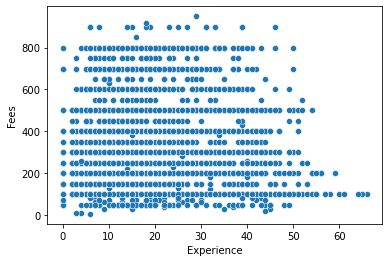

In [38]:
sns.scatterplot(x='Experience',y='Fees',data=train_df)

In [39]:
#### Good Relationship with fess is showing in data set

<AxesSubplot:xlabel='Rating', ylabel='count'>

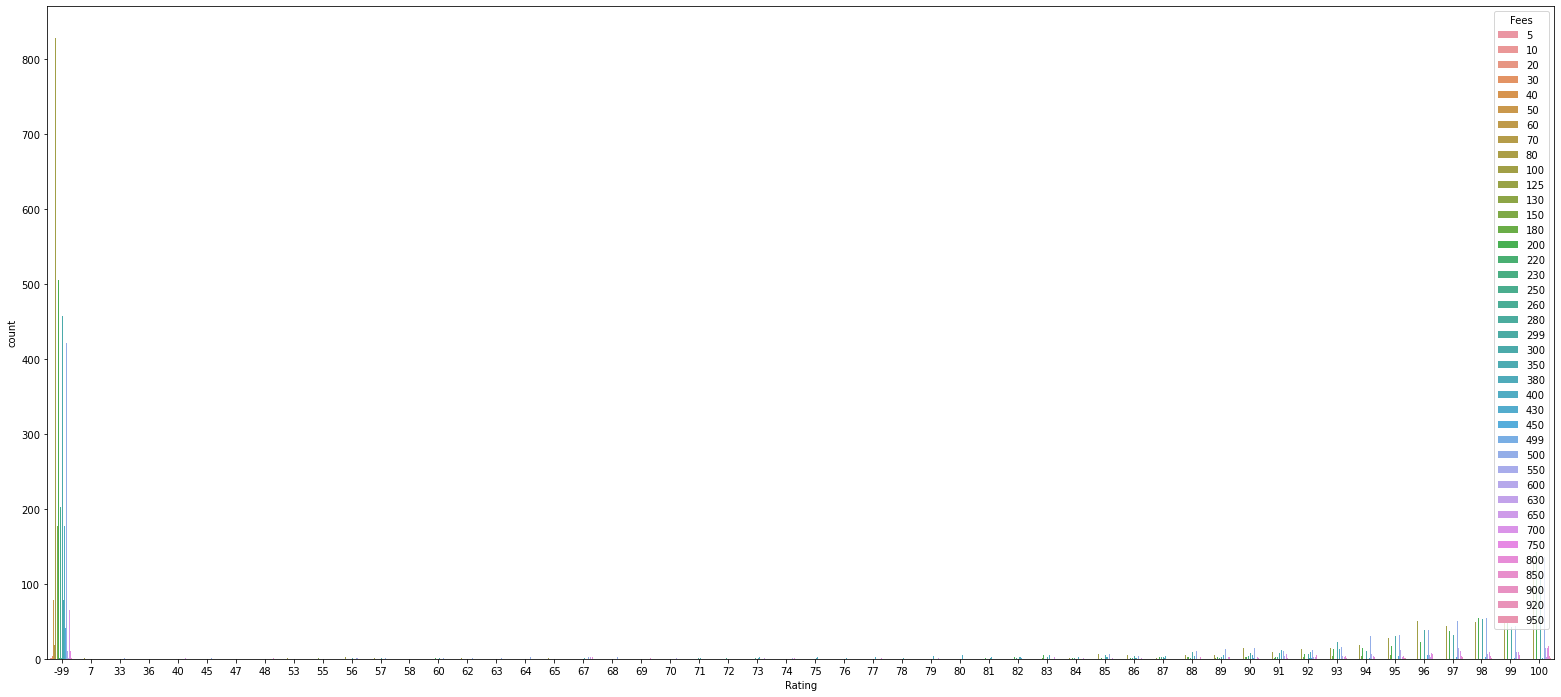

In [40]:
plt.figure(figsize=(27,12))
sns.countplot(x='Rating',hue='Fees',data=train_df)

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

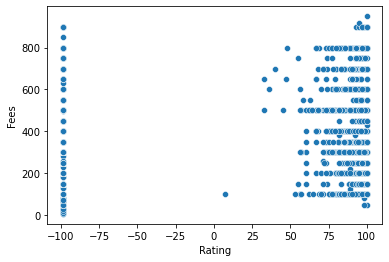

In [41]:
sns.scatterplot(x='Rating',y='Fees',data=train_df)

In [42]:
##### rating between 75 and 100 have good fees showing in chart

In [43]:
train_df.columns

Index(['Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info',
       'Fees', 'City', 'Qual_1', 'Qual_2', 'Qual_3', 'Qual_4'],
      dtype='object')

<AxesSubplot:xlabel='City', ylabel='count'>

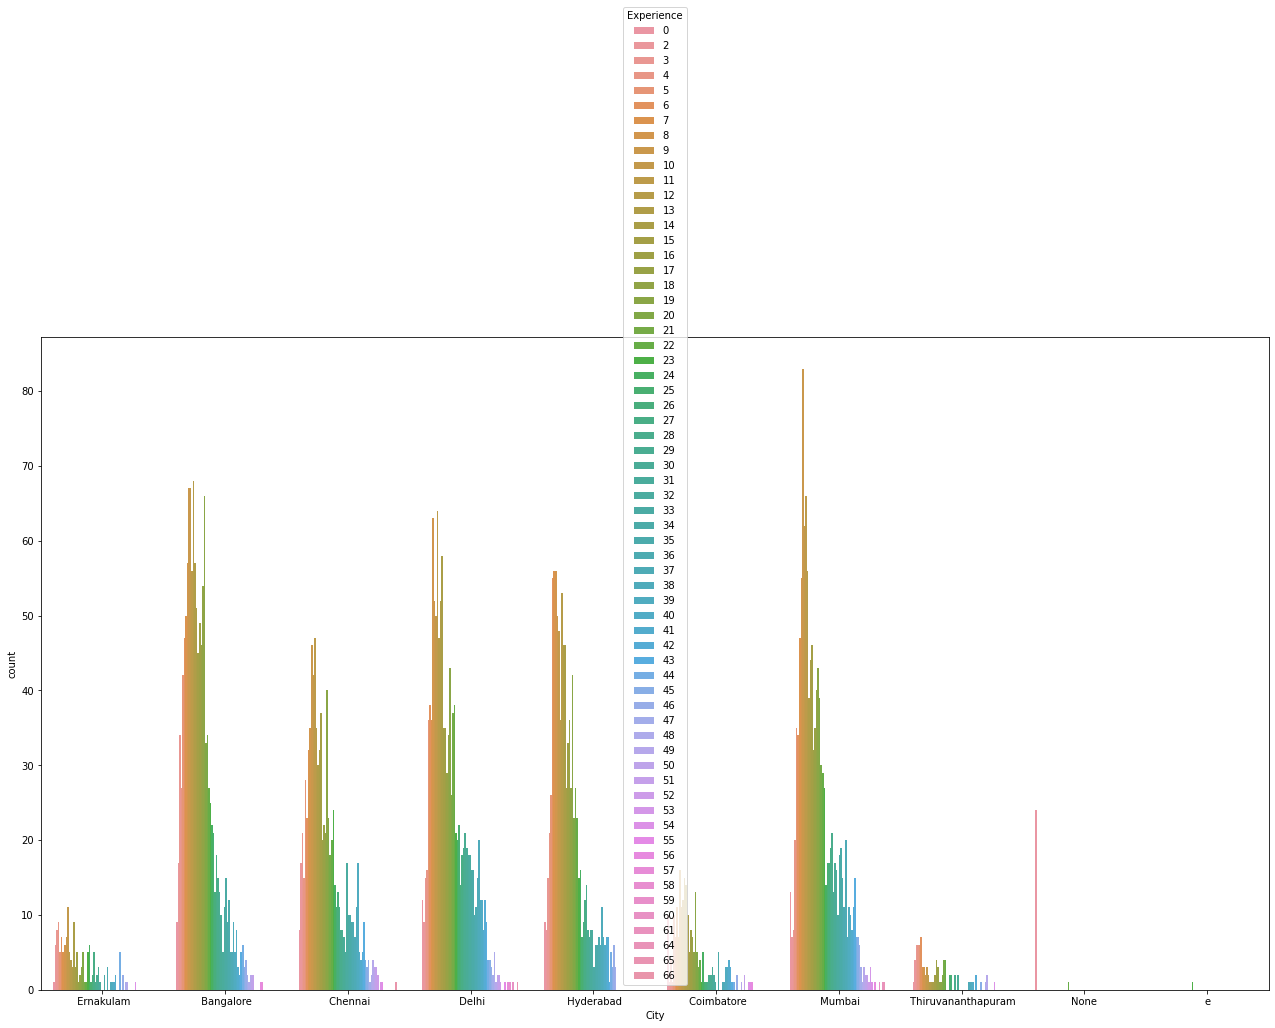

In [44]:
plt.figure(figsize=(22,12))
sns.countplot(x='City',hue='Experience',data=train_df)

In [45]:
##### Banglore ,Chennai,Mumbai have height experience doter having experience like  8,9 and More

<AxesSubplot:xlabel='Experience', ylabel='City'>

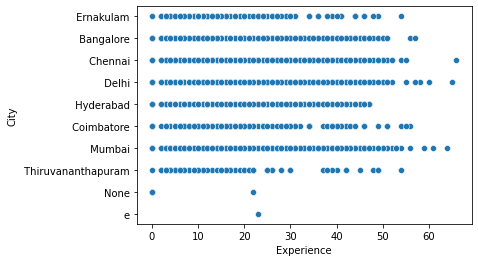

In [46]:
sns.scatterplot(x='Experience',y='City',data=train_df)

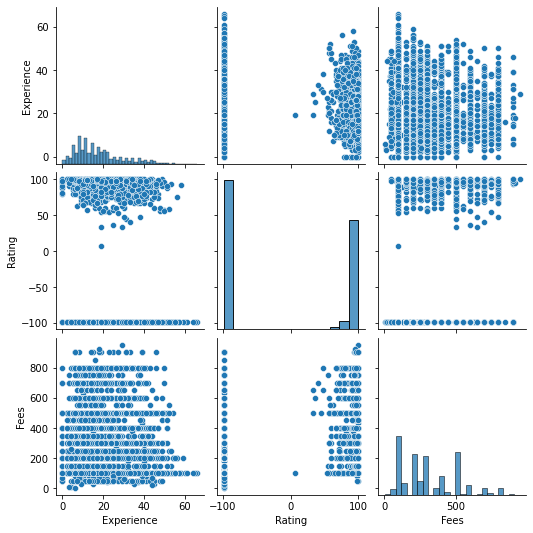

In [47]:
sns.pairplot(train_df)

In [48]:
##### experience with fess having good relationship between each other

In [49]:
#### see the statistical information like data types of columns prerset in dataset
train_df.dtypes

Experience             int32
Rating                 int32
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
City                  object
Qual_1                object
Qual_2                object
Qual_3                object
Qual_4                object
dtype: object

In [50]:
#### Object type columns are in catagorical form have to solve the problem

In [51]:
#### check the statstical  summary
train_df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,-12.622211,307.944640
std,11.142798,96.407619,190.920373
min,0.000000,-99.000000,5.000000
25%,9.000000,-99.000000,150.000000
50%,14.000000,-99.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


<AxesSubplot:xlabel='Experience'>

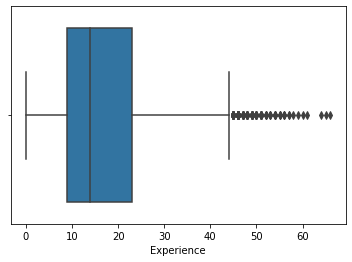

In [52]:
sns.boxplot(train_df['Experience'])

In [53]:
##### presence of outliers is showing

<AxesSubplot:xlabel='Rating'>

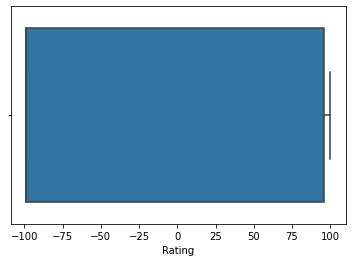

In [54]:
sns.boxplot(train_df['Rating'])

In [55]:
##### check the skewness
train_df.skew()

Experience    0.991089
Rating        0.225184
Fees          0.751870
dtype: float64

<AxesSubplot:xlabel='Experience', ylabel='Density'>

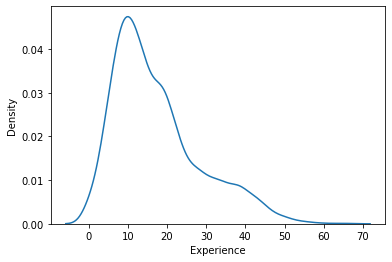

In [56]:
sns.kdeplot(train_df['Experience']) 

In [57]:
##### Right Skewness in dataset

<AxesSubplot:xlabel='Rating', ylabel='Density'>

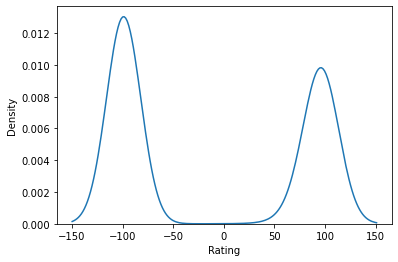

In [58]:
sns.kdeplot(train_df['Rating'])

In [59]:
quantile1=train_df.quantile(0.25)

In [60]:
quantile3=train_df.quantile(0.75)

In [61]:
iqr_val=quantile3-quantile1
iqr_val


Experience     14.0
Rating        195.0
Fees          350.0
dtype: float64

In [62]:
lower_limit=quantile1-(1.5*iqr_val)
upper_limit=quantile3+(1.5*iqr_val)

In [63]:
quant1 =train_df['Experience'].quantile(.98)

<AxesSubplot:xlabel='Experience', ylabel='Density'>

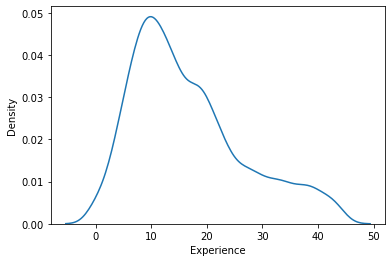

In [64]:
new = train_df['Experience'][train_df['Experience'] < quant1]
sns.kdeplot(new)

In [65]:
df=train_df[train_df['Experience']<quant1]
print(train_df.shape)

(5961, 11)


In [66]:
from scipy import stats

In [67]:
#train_df.skew()

In [68]:
#train_df['Experience']=np.cbrt(train_df['Experience'])

<AxesSubplot:>

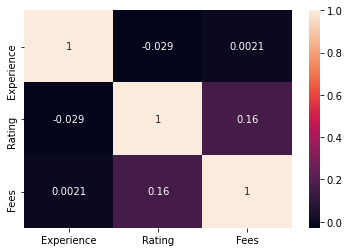

In [69]:
sns.heatmap(train_df.corr(),annot=True)

In [70]:
#### Rating with fess having good co relation 

In [71]:
train_df

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4
0,24,100,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,BHMS,MD,Homeopathy,None
1,12,98,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,BAMS,MD,Ayurveda Medicine,None
2,9,-99,Mathikere - BEL,ENT Specialist,None,300,Bangalore,MBBS,MS,Otorhinolaryngology,None
3,12,-99,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,Bangalore,BSc,BAMS,None,Zoology
4,20,100,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,MBBS,MS,ENT,None
5957,33,-99,Nungambakkam,General Medicine,None,100,Chennai,MBBS,None,None,None
5958,41,97,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,MBBS,None,None,None
5959,15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,MBBS,MD,General Medicine,None


In [72]:
train_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [73]:
train_df

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4
0,24,100,Kakkanad,Homeopath,100,Ernakulam,BHMS,MD,Homeopathy,None
1,12,98,Whitefield,Ayurveda,350,Bangalore,BAMS,MD,Ayurveda Medicine,None
2,9,-99,Mathikere - BEL,ENT Specialist,300,Bangalore,MBBS,MS,Otorhinolaryngology,None
3,12,-99,Bannerghatta Road,Ayurveda,250,Bangalore,BSc,BAMS,None,Zoology
4,20,100,Keelkattalai,Ayurveda,250,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...
5956,19,98,Basavanagudi,ENT Specialist,300,Bangalore,MBBS,MS,ENT,None
5957,33,-99,Nungambakkam,General Medicine,100,Chennai,MBBS,None,None,None
5958,41,97,Greater Kailash Part 2,General Medicine,600,Delhi,MBBS,None,None,None
5959,15,90,Vileparle West,General Medicine,100,Mumbai,MBBS,MD,General Medicine,None


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le=LabelEncoder()

In [76]:
train_df['Place']=le.fit_transform(train_df['Place'])

In [77]:
train_df

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4
0,24,100,296,Homeopath,100,Ernakulam,BHMS,MD,Homeopathy,None
1,12,98,856,Ayurveda,350,Bangalore,BAMS,MD,Ayurveda Medicine,None
2,9,-99,452,ENT Specialist,300,Bangalore,MBBS,MS,Otorhinolaryngology,None
3,12,-99,68,Ayurveda,250,Bangalore,BSc,BAMS,None,Zoology
4,20,100,335,Ayurveda,250,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...
5956,19,98,70,ENT Specialist,300,Bangalore,MBBS,MS,ENT,None
5957,33,-99,536,General Medicine,100,Chennai,MBBS,None,None,None
5958,41,97,215,General Medicine,600,Delhi,MBBS,None,None,None
5959,15,90,841,General Medicine,100,Mumbai,MBBS,MD,General Medicine,None


In [78]:
train_df['Profile']=le.fit_transform(train_df['Profile'])

In [79]:
train_df['Qual_1']=le.fit_transform(train_df['Qual_1'])
train_df['Qual_2']=le.fit_transform(train_df['Qual_2'])
train_df['Qual_3']=le.fit_transform(train_df['Qual_3'])
train_df['Qual_4']=le.fit_transform(train_df['Qual_4'])

In [80]:
train_df_City=pd.get_dummies(train_df['City'])

In [81]:
train_df_City

,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,None,e
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,0
5957,0,1,0,0,0,0,0,0,0,0
5958,0,0,0,1,0,0,0,0,0,0
5959,0,0,0,0,0,0,1,0,0,0


In [82]:
train_df=train_df.join(train_df_City)

In [83]:
train_df.drop(['City'],axis=1,inplace=True)

In [84]:
train_df

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2,Qual_3,Qual_4,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,None,e
0,24,100,296,5,100,8,207,46,60,0,0,0,0,1,0,0,0,0,0
1,12,98,856,0,350,5,207,8,60,1,0,0,0,0,0,0,0,0,0
2,9,-99,452,3,300,69,224,80,60,1,0,0,0,0,0,0,0,0,0
3,12,-99,68,0,250,12,7,127,58,1,0,0,0,0,0,0,0,0,0
4,20,100,335,0,250,5,301,127,60,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,70,3,300,69,224,32,60,1,0,0,0,0,0,0,0,0,0
5957,33,-99,536,4,100,69,301,127,60,0,1,0,0,0,0,0,0,0,0
5958,41,97,215,4,600,69,301,127,60,0,0,0,1,0,0,0,0,0,0
5959,15,90,841,4,100,69,207,40,60,0,0,0,0,0,0,1,0,0,0


In [85]:
x=train_df.drop(['Fees'],axis=1)

In [86]:
y=train_df['Fees']

In [87]:
x

,Experience,Rating,Place,Profile,Qual_1,Qual_2,Qual_3,Qual_4,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,None,e
0,24,100,296,5,8,207,46,60,0,0,0,0,1,0,0,0,0,0
1,12,98,856,0,5,207,8,60,1,0,0,0,0,0,0,0,0,0
2,9,-99,452,3,69,224,80,60,1,0,0,0,0,0,0,0,0,0
3,12,-99,68,0,12,7,127,58,1,0,0,0,0,0,0,0,0,0
4,20,100,335,0,5,301,127,60,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,70,3,69,224,32,60,1,0,0,0,0,0,0,0,0,0
5957,33,-99,536,4,69,301,127,60,0,1,0,0,0,0,0,0,0,0
5958,41,97,215,4,69,301,127,60,0,0,0,1,0,0,0,0,0,0
5959,15,90,841,4,69,207,40,60,0,0,0,0,0,0,1,0,0,0


In [88]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred=model.predict(x)
    
    #perform Cross validation
    cv_score=cross_val_score(model,x,y,scoring='r2',cv=5)
   
    print('Model Report')
    print('MSE :',mean_squared_error(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print("cv score :",cv_score)

Model Report
MSE : 30307.86030479785
RMSE: 174.09152852680066
cv score : [0.17194719 0.16252697 0.16736494 0.15064226 0.16500918]


<AxesSubplot:title={'center':'Model Coficient'}>

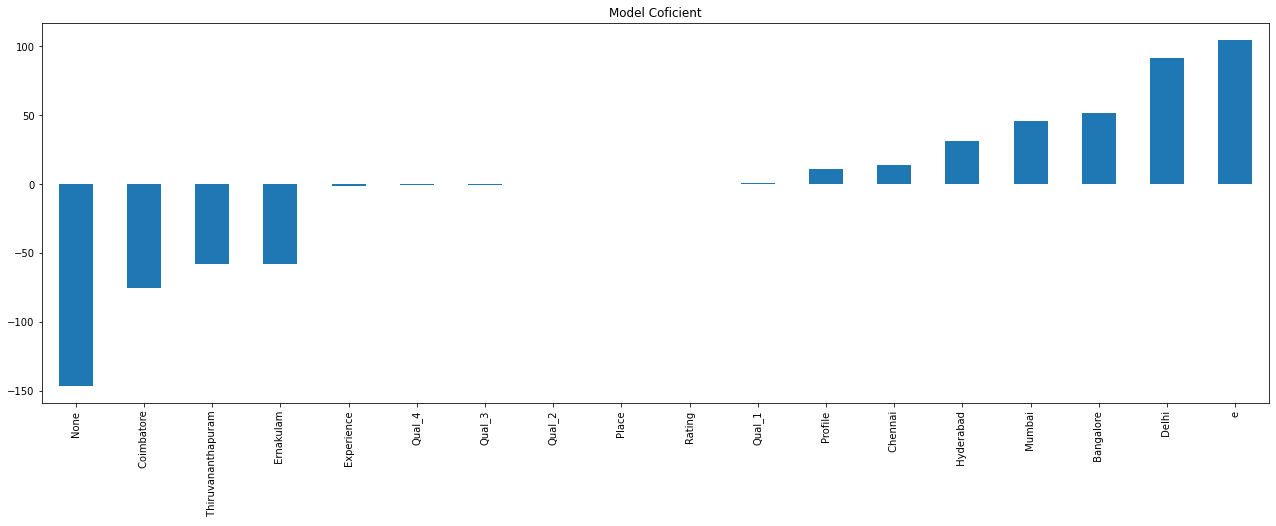

In [90]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model=LinearRegression()
train(model,x,y)
coef =pd.Series(model.coef_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Model Coficient')

Model Report
MSE : 30308.50719214759
RMSE: 174.09338641128096
cv score : [0.17196064 0.16253454 0.16734282 0.15064817 0.16499454]


<AxesSubplot:title={'center':'Model Coficient'}>

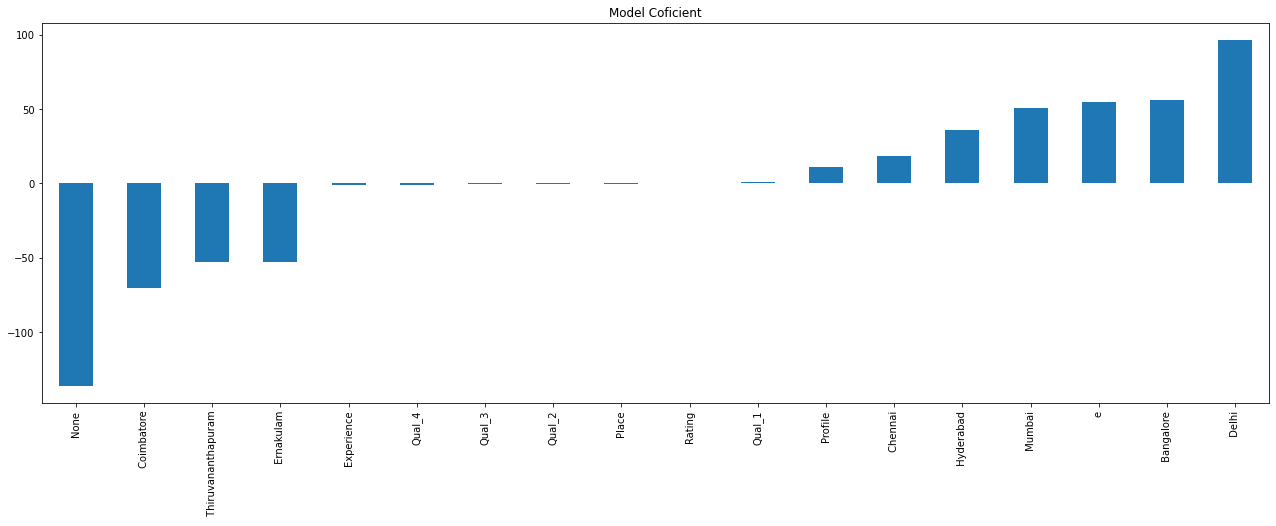

In [91]:
model=Ridge()
train(model,x,y)
coef =pd.Series(model.coef_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Model Coficient')

#### More Error is showing means difference is more between actual and Predict

In [92]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [94]:
RF.fit(x,y)

RandomForestRegressor()

In [95]:
pred_test=RF.predict(x_test)

In [96]:
pred_train=RF.predict(x_train)

In [97]:
pred_test
print(r2_score(y_test,pred_test))
rfs=r2_score(y_test,pred_test)
print('R2_score:',rfs*100)
rfscore=cross_val_score(RF,x,y,cv=5,scoring='r2')
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

0.8899414161369263
R2_score: 88.99414161369263
cross_val_score 18.87554818744903


In [98]:
clf=RandomForestRegressor(random_state=0,criterion='mse')
clf.fit(x,y)
y_pred=clf.predict(x)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y,y_pred)))


RMSE loss in train : 64.25097289875148


In [99]:
clf.score(x,y)

0.8867266539693297

In [100]:
y_test

1398    300
4310    500
2455    250
2285    800
3891    100
       ... 
5331    500
88      250
1715    300
2026    400
470     400
Name: Fees, Length: 1491, dtype: int64

In [101]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=clf.predict(x_test)
print('RMSE loss in validation :',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE loss in train : 65.06194557132268
RMSE loss in validation : 171.8130216894886


In [111]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
ET=ExtraTreeRegressor(random_state=0,criterion='mse')
ET.fit(x,y)
y_pred=ET.predict(x)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y_test,pred_test))
rfs=r2_score(y_test,pred_test)
print('R2_score:',rfs*100)
rfscore=cross_val_score(RF,x,y,cv=5,scoring='r2')
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

RMSE loss in train : 11.198892748488529
0.8899414161369263
R2_score: 88.99414161369263
cross_val_score 19.106147049069826


ET.score(x,y)

In [104]:
BG=BaggingRegressor(n_estimators=10, random_state=0)
BG.fit(x,y)
y_pred=BG.predict(x)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y,y_pred)))

RMSE loss in train : 75.65620571938976


In [105]:
BG.score(x,y)

0.8429429532134127

##### from Extra Tress Regressor the RMSE is 11.19 least among all error and score is also good so from above train ExtratreeRegressor is best model